Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Data Preprocessing

In [12]:
# Import training set
train_path = 'D:/Onedrive/experiments/experiments/ML\DL/P16-Deep-Learning-AZ/Deep Learning A-Z/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Train.csv'
dataset_train = pd.read_csv(train_path)
training_set = dataset_train.iloc[:, 1:2].values # only the 'open' column

# Feature Scaling
# its recommended to use normalization when sigmoid is used as activation function
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time steps and 1 output
# basically the last 60 time steps of data will be used to predict the next output
x_train = [] # last 60 stock prices
y_train = [] # next output
# also means we have to start predicting from 60th day onwards and not from day 1
for i in range(60, 1258):
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data to include more params later (if required)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Building the RNN

In [16]:
# Building a stacked LSTM with dropouts to prevent overfitting
# Initialize the RNN
regressor = Sequential()
# Adding 1st LSTM Layer and some dropout regularization
regressor.add(LSTM(units = 64, return_sequences = True, input_shape=(x_train.shape[1], 1))) # (no of units, return sequence, input shape)
# Since we're using a stacked LSTM, we need to set return sequence to 'true'
regressor.add(Dropout(0.2)) # 20% dropout (recommended value)
# Adding 2nd LSTM Layer and some dropout regularization
regressor.add(LSTM(units = 64, return_sequences = True)) # (no of units, return sequence, input shape)
regressor.add(Dropout(0.2)) # 20% dropout (recommended value)
# Adding 3rd LSTM Layer and some dropout regularization
regressor.add(LSTM(units = 128, return_sequences = True)) # (no of units, return sequence, input shape)
regressor.add(Dropout(0.2)) # 20% dropout (recommended value)
# Adding 4th LSTM Layer and some dropout regularization (last LSTM layer so return sequence must be false)
regressor.add(LSTM(units = 64)) # (no of units, return sequence, input shape)
regressor.add(Dropout(0.2)) # 20% dropout (recommended value)
# Adding Output Layer
regressor.add(Dense(units = 1)) # Output is the stock price for the next time step (single output)

In [17]:
# Compiling the RNN
# usually RMSprop optimizer is suggested for RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 80ms/step - loss: 0.0304
Epoch 2/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0050
Epoch 3/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0044
Epoch 4/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0044
Epoch 5/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0040
Epoch 7/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0034
Epoch 11/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0034
Epoch 13/100
38/38 [

Making Predictions and Visualization

In [19]:
# Getting the real stock price of 2017 (January)
# Loading test set
test_path = 'D:/Onedrive/experiments/experiments/ML/DL/P16-Deep-Learning-AZ\Deep Learning A-Z/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Test.csv'
dataset_test = pd.read_csv(test_path)
real_stock_price = dataset_test.iloc[:, 1:2].values


In [24]:
# Get the predicted stock price of 2017 (January)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0) 
# vertical concatenation - axis 0 & horizontal concatenation - axis 1
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []

for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_25368\1106527374.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values


1/1 [==============================] - 1s 1s/step


In [25]:
predicted_stock_price

array([[797.5374 ],
       [794.48737],
       [796.2316 ],
       [797.6136 ],
       [801.4346 ],
       [808.236  ],
       [812.9632 ],
       [813.62445],
       [813.8171 ],
       [814.1447 ],
       [814.4656 ],
       [814.44354],
       [814.36774],
       [815.2387 ],
       [816.24884],
       [822.6974 ],
       [830.30646],
       [837.55914],
       [839.8082 ],
       [832.1338 ]], dtype=float32)

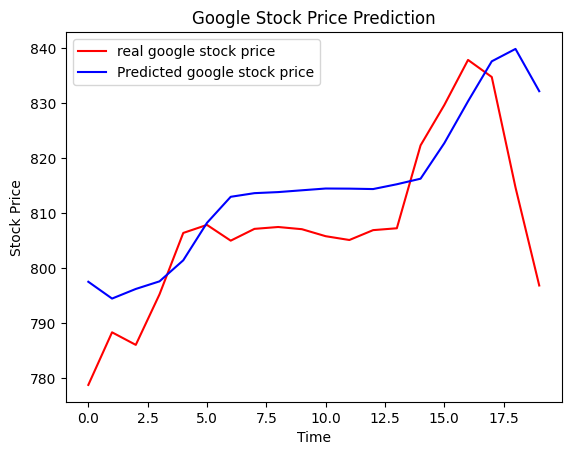

In [26]:
# Visualizing the results
plt.plot(real_stock_price, color='red', label = 'real google stock price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()